In [1]:
# looking at Lyme disease for 2018, 2019, 2020 and 2021 to see if covid restrictions affected 
# the infection rate due to the COVID restrictions put in place

In [2]:
%matplotlib notebook

In [3]:
#dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [4]:
#set path to csv files
lyme_data = "Resources/Lyme.csv"
lyme_data_2021 = "Resources/Lyme_claims.csv"

In [5]:
#using lyme disease insurance cases as an indicator of confirmed cases for the year
lyme_claims_df = pd.read_csv(lyme_data_2021)
lyme_claims_df.head()

,STATEFP,NAME,STUSPS,YEAR,MONTH,RATE
0,1,Alabama,AL,2016,January,2.888904
1,1,Alabama,AL,2016,February,4.044466
2,1,Alabama,AL,2016,March,6.355589
3,1,Alabama,AL,2016,April,4.044466
4,1,Alabama,AL,2016,May,5.777809


In [6]:
#extract just the needed information
lyme_df = lyme_claims_df[['NAME', 'YEAR', 'MONTH', 'RATE']]
lyme_df

,NAME,YEAR,MONTH,RATE
0,Alabama,2016,January,2.888904
1,Alabama,2016,February,4.044466
2,Alabama,2016,March,6.355589
3,Alabama,2016,April,4.044466
4,Alabama,2016,May,5.777809
...,...,...,...,...
3664,Wyoming,2021,August,NaN
3665,Wyoming,2021,September,NaN
3666,Wyoming,2021,October,NaN
3667,Wyoming,2021,November,NaN


In [7]:
#cleaning data by dropping rows missing data in the rate column
lyme_df.dropna(subset=['RATE'], inplace=True)
lyme_df

,NAME,YEAR,MONTH,RATE
0,Alabama,2016,January,2.888904
1,Alabama,2016,February,4.044466
2,Alabama,2016,March,6.355589
3,Alabama,2016,April,4.044466
4,Alabama,2016,May,5.777809
...,...,...,...,...
3596,Wisconsin,2021,September,6.072341
3597,Wisconsin,2021,October,9.448888
3598,Wisconsin,2021,November,3.838611
3599,Wisconsin,2021,December,2.893722


In [8]:
lyme_2018=lyme_df[lyme_df["YEAR"]==2018]
lyme_2019=lyme_df[lyme_df["YEAR"]==2019]
lyme_2020=lyme_df[lyme_df["YEAR"]==2020]
lyme_2021=lyme_df[lyme_df["YEAR"]==2021]

rate_by_state_2018 = lyme_2018.groupby(['MONTH']).agg({'RATE': ['mean']})
rate_by_state_2018.columns=["RATE_mean_2018"]
rate_2018_df = rate_by_state_2018.reset_index()
rate_2018_df

,MONTH,RATE_mean_2018
0,April,5.829266
1,August,8.478789
2,December,4.416779
3,February,4.068763
4,January,4.613691
5,July,11.341938
6,June,13.690299
7,March,4.859412
8,May,10.018721
9,November,4.939464


In [9]:
rate_by_state_2019 = lyme_2019.groupby(['MONTH']).agg({'RATE': ['mean']})
rate_by_state_2019.columns=["RATE_mean_2019"]
rate_2019_df = rate_by_state_2019.reset_index()
rate_2019_df

,MONTH,RATE_mean_2019
0,April,6.375657
1,August,8.206094
2,December,3.904278
3,February,3.725689
4,January,4.280127
5,July,11.411247
6,June,12.332410
7,March,4.806890
8,May,9.800251
9,November,4.907845


In [10]:
rate_by_state_2020 = lyme_2020.groupby(['MONTH']).agg({'RATE': ['mean']})
rate_by_state_2020.columns=["RATE_mean_2020"]
rate_2020_df = rate_by_state_2020.reset_index()
rate_2020_df

,MONTH,RATE_mean_2020
0,April,3.578829
1,August,5.452507
2,December,2.708375
3,February,2.386131
4,January,2.361370
5,July,8.232793
6,June,8.897217
7,March,2.814507
8,May,6.261276
9,November,3.837449


In [11]:
rate_by_state_2021 = lyme_2021.groupby(['MONTH']).agg({'RATE': ['mean']})
rate_by_state_2021.columns=["RATE_mean_2021"]
rate_2021_df =rate_by_state_2021.reset_index()
rate_2021_df

,MONTH,RATE_mean_2021
0,April,4.790493
1,August,6.085618
2,December,2.567262
3,February,2.422383
4,January,2.708808
5,July,11.350327
6,June,8.682824
7,March,3.411057
8,May,6.647007
9,November,3.499673


In [12]:
#merge the 2018-2021 month and rate_mean dataframes
lyme_rate_over_years = rate_2018_df.merge(rate_2019_df,on='MONTH').merge(rate_2020_df).merge(rate_2021_df,on='MONTH')
lyme_rate_over_years

,MONTH,RATE_mean_2018,RATE_mean_2019,RATE_mean_2020,RATE_mean_2021
0,April,5.829266,6.375657,3.578829,4.790493
1,August,8.478789,8.206094,5.452507,6.085618
2,December,4.416779,3.904278,2.708375,2.567262
3,February,4.068763,3.725689,2.386131,2.422383
4,January,4.613691,4.280127,2.361370,2.708808
5,July,11.341938,11.411247,8.232793,11.350327
6,June,13.690299,12.332410,8.897217,8.682824
7,March,4.859412,4.806890,2.814507,3.411057
8,May,10.018721,9.800251,6.261276,6.647007
9,November,4.939464,4.907845,3.837449,3.499673


<IPython.core.display.Javascript object>


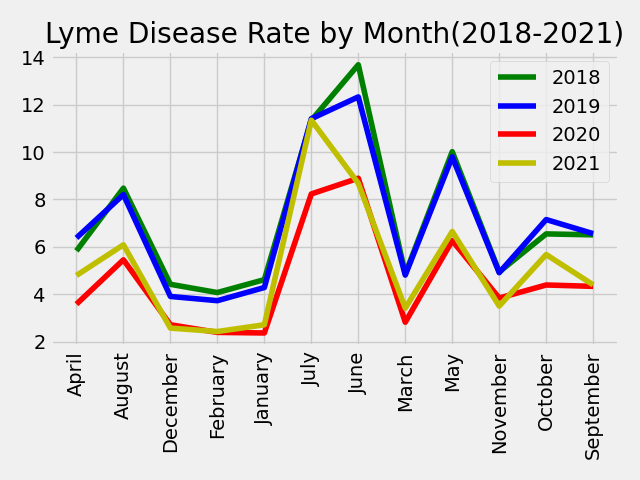

In [13]:
#plot the dataframes for the rate of infection by month over the years
style.use('fivethirtyeight')
plt.plot(lyme_rate_over_years['MONTH'], lyme_rate_over_years['RATE_mean_2018'], color='g', label='2018')
plt.plot(lyme_rate_over_years['MONTH'], lyme_rate_over_years['RATE_mean_2019'], color='b', label='2019')
plt.plot(lyme_rate_over_years['MONTH'], lyme_rate_over_years['RATE_mean_2020'], color='r', label='2020')
plt.plot(lyme_rate_over_years['MONTH'], lyme_rate_over_years['RATE_mean_2021'], color='y', label='2021')
plt.xticks(rotation = 90)
plt.title('Lyme Disease Rate by Month(2018-2021)')
plt.legend()
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


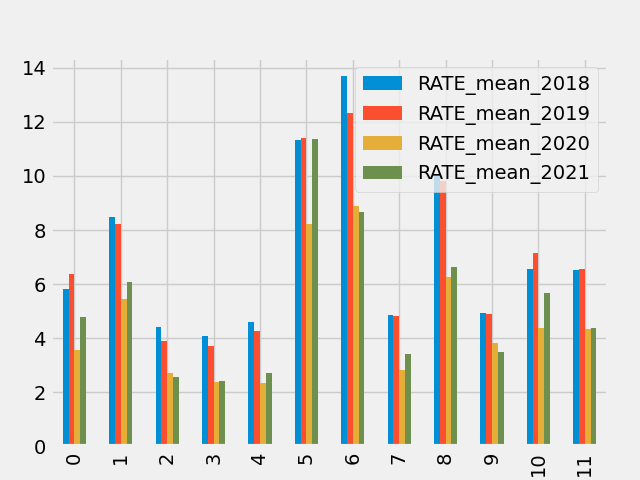

In [14]:
#bar chart
plot_bar = lyme_rate_over_years.plot.bar()
plt.legend(loc='best')

In [15]:
#Determine the high and low states in 2020 with infection in relation to staes with high covid rate 
lyme_top=lyme_df[lyme_df["YEAR"]==2020]
lyme_high=lyme_top[(lyme_top["NAME"]=="Hawaii")|(lyme_top ["NAME"]=="Connecticut")|(lyme_top ["NAME"]=="New Mexico")]
lyme_high

,NAME,YEAR,MONTH,RATE
480,Connecticut,2020,January,2.275948
481,Connecticut,2020,February,2.473856
482,Connecticut,2020,March,7.124706
483,Connecticut,2020,April,9.004837
484,Connecticut,2020,May,16.426406
485,Connecticut,2020,June,27.410328
486,Connecticut,2020,July,20.681439
487,Connecticut,2020,August,16.426406
488,Connecticut,2020,September,9.202745
489,Connecticut,2020,October,10.192288


In [16]:
#groupby and take the sum to plot
lyme_high2 = lyme_high.groupby(["NAME"]).agg({"RATE": ['sum']})
lyme_high2.columns = ["RATE_sum"]
lyme_high2

,RATE_sum
NAME,
Connecticut,136.161050
New Mexico,10.180974


In [17]:
lyme_bottom=lyme_df[lyme_df["YEAR"]==2020]
lyme_low=lyme_bottom[(lyme_bottom["NAME"]=="Vermont")|(lyme_bottom ["NAME"]=="Hawaii")\
|(lyme_bottom ["NAME"]=="Maine")|(lyme_bottom ["NAME"]=="Wyoming")|(lyme_bottom ["NAME"]=="Arkansas")|\
(lyme_bottom ["NAME"]=="New Hampshire")|(lyme_bottom ["NAME"]=="Delaware")|(lyme_bottom ["NAME"]=="Montana")|\
(lyme_bottom ["NAME"]=="Rhode Island")|(lyme_bottom ["NAME"]=="North Dakota")|(lyme_bottom ["NAME"]=="West Virginia")]
lyme_low
                    

,NAME,YEAR,MONTH,RATE
268,Arkansas,2020,May,0.870863
269,Arkansas,2020,June,1.161150
271,Arkansas,2020,August,0.870863
272,Arkansas,2020,September,1.741725
273,Arkansas,2020,October,0.870863
...,...,...,...,...
3512,West Virginia,2020,September,5.371618
3513,West Virginia,2020,October,5.859947
3514,West Virginia,2020,November,4.883289
3515,West Virginia,2020,December,1.953316


In [18]:
lyme_low2 = lyme_low.groupby(["NAME"]).agg({"RATE": ['sum']})
lyme_low2.columns = ["RATE_sum"]
lyme_low2

,RATE_sum
NAME,
Arkansas,5.515464
Delaware,72.004608
Maine,70.028578
Montana,4.078830
New Hampshire,70.439515
North Dakota,3.197578
Rhode Island,89.759680
Vermont,129.149667
West Virginia,79.109288


In [19]:
#merging the sum of infection in states with low covid rates and high covid rates to compare with lyme disease infection
lyme_high_and_low = pd.merge(lyme_low2, lyme_high2, on =["NAME","RATE_sum"], how="outer")
lyme_high_and_low2 = lyme_high_and_low.reset_index()
lyme_high_and_low2

,NAME,RATE_sum
0,Arkansas,5.515464
1,Delaware,72.004608
2,Maine,70.028578
3,Montana,4.078830
4,New Hampshire,70.439515
5,North Dakota,3.197578
6,Rhode Island,89.759680
7,Vermont,129.149667
8,West Virginia,79.109288
9,Wyoming,3.907318


In [29]:
lyme_high_and_low_df = pd.DataFrame(lyme_high_and_low2)
lyme_high_and_low_df2 = lyme_high_and_low_df.reset_index()
lyme_high_and_low_df2

,index,NAME,RATE_sum
0,0,Arkansas,5.515464
1,1,Delaware,72.004608
2,2,Maine,70.028578
3,3,Montana,4.078830
4,4,New Hampshire,70.439515
5,5,North Dakota,3.197578
6,6,Rhode Island,89.759680
7,7,Vermont,129.149667
8,8,West Virginia,79.109288
9,9,Wyoming,3.907318


<IPython.core.display.Javascript object>


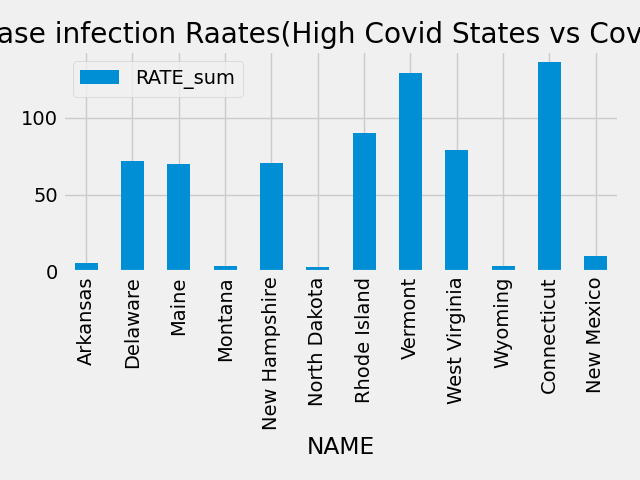

In [32]:
#plot the dataframe using a bar graph
bar_plot = lyme_high_and_low.plot.bar()
plt.title('Lyme Disease infection Raates(High Covid States vs Covid Low States')
plt.tight_layout()

In [21]:
#it does seem to be much changes to the infection rate of lyme disease when compared to states with high covid cases
#and states with low covid cases 